In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Read the data into a DataFrame
df = pd.DataFrame(pd.read_csv("Automobile_data.csv"))

In [3]:
# Replace '?' with pd.NA (null values) and drop rows with missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [4]:
# Convert specific columns to numeric
df['price'] = pd.to_numeric(df["price"])
df['peak-rpm'] = pd.to_numeric(df["peak-rpm"].apply(lambda x: "0" if x == '?' else x))
df['horsepower'] = pd.to_numeric(df["horsepower"].apply(lambda x: "0" if x == '?' else x))
df['normalized-losses'] = pd.to_numeric(df["normalized-losses"].apply(lambda x: "0" if x == '?' else x))
df['bore'] = pd.to_numeric(df["bore"].apply(lambda x: "0" if x == '?' else x))
df['stroke'] = pd.to_numeric(df["stroke"].apply(lambda x: "0" if x == '?' else x))

# Display DataFrame data types
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


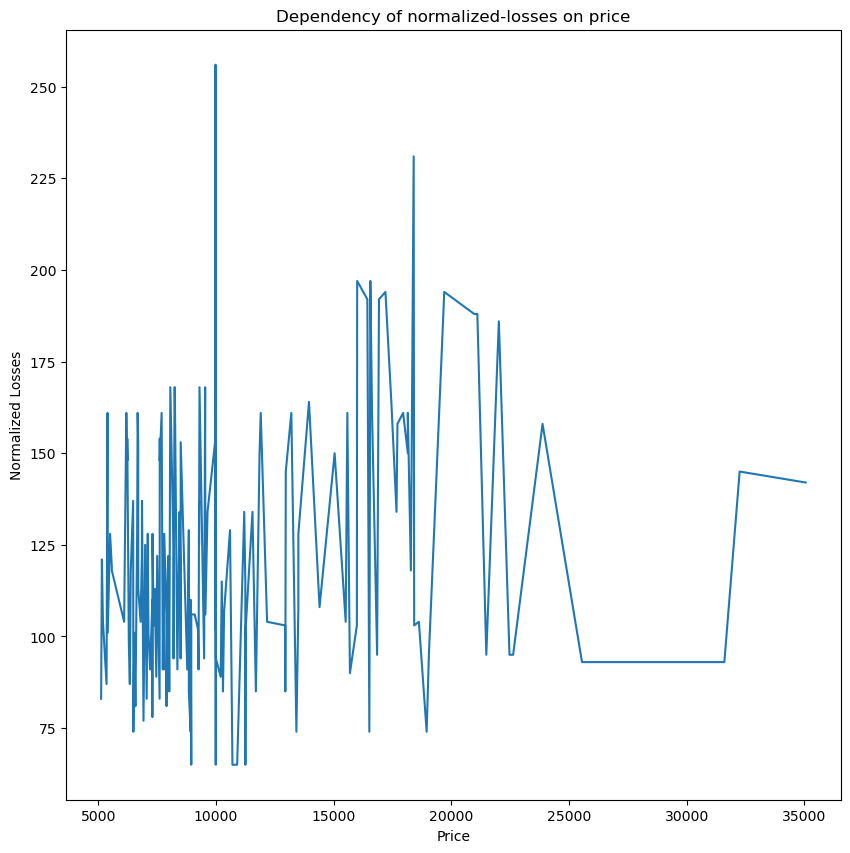

In [5]:
# Plotting and visualization
plt.figure(figsize=[10, 10])

# Plotting price vs normalized-losses
df_sorted = df.sort_values(by='price')
data1 = df_sorted['price']
data2 = df_sorted['normalized-losses']
plt.plot(data1, data2)
plt.title('Dependency of normalized-losses on price')
plt.xlabel('Price')
plt.ylabel('Normalized Losses')
plt.show()

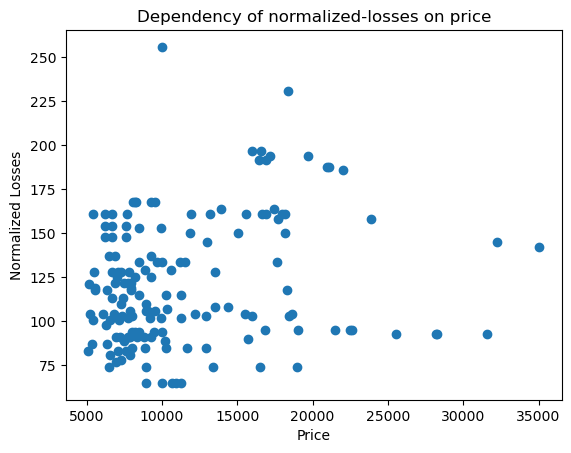

In [6]:
# Scatter plot price vs normalized-losses
plt.scatter(data1, data2)
plt.title('Dependency of normalized-losses on price')
plt.xlabel('Price')
plt.ylabel('Normalized Losses')
plt.show()

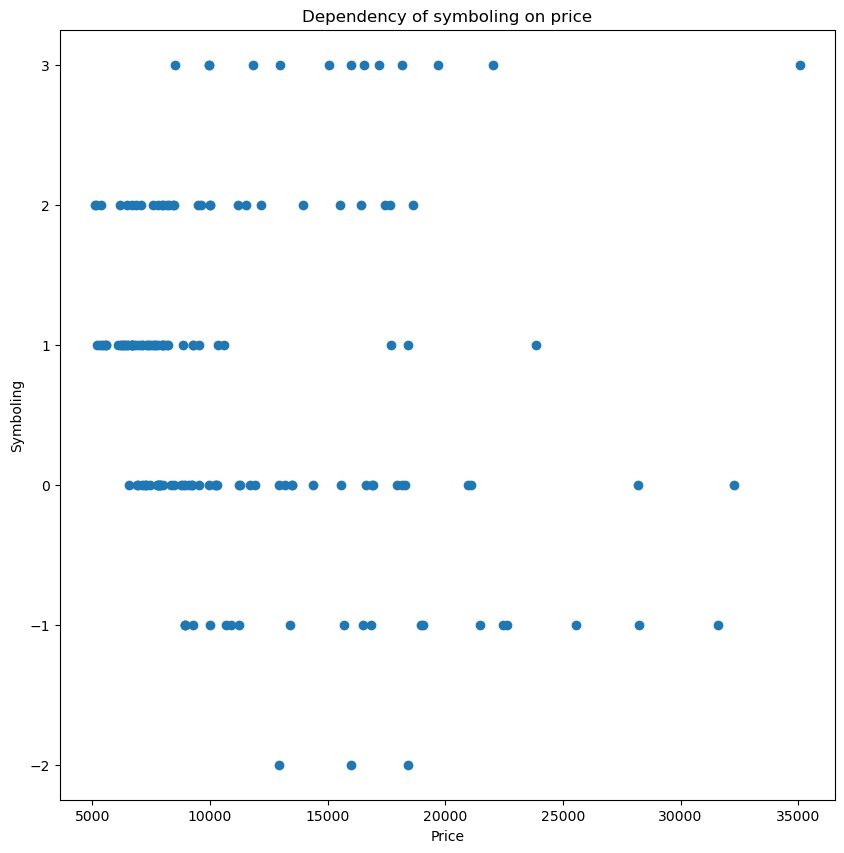

In [7]:
# Scatter plot price vs symboling
data2 = df_sorted['symboling']
plt.figure(figsize=[10, 10])
plt.scatter(data1, data2)
plt.title('Dependency of symboling on price')
plt.xlabel('Price')
plt.ylabel('Symboling')
plt.show()

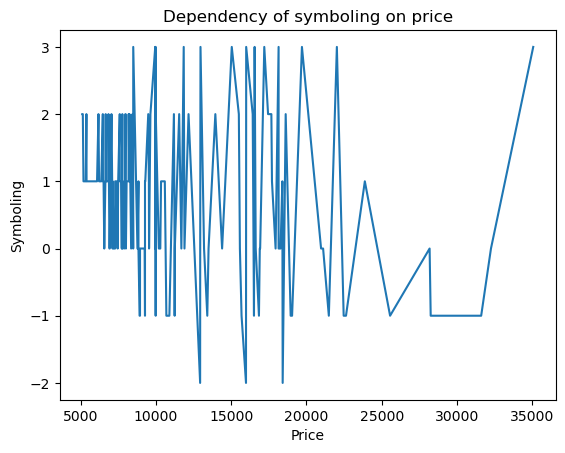

In [8]:
# Scatter plot price vs symboling with a line plot
plt.plot(data1, data2)
plt.title('Dependency of symboling on price')
plt.xlabel('Price')
plt.ylabel('Symboling')
plt.show()

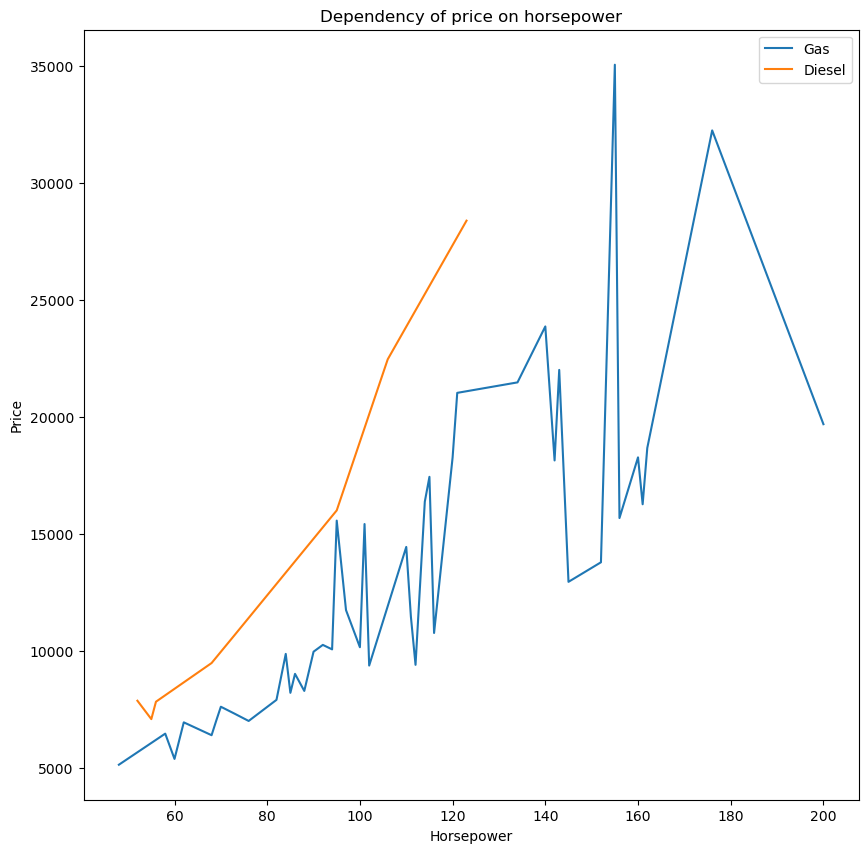

In [9]:
# Plotting price dependency on horsepower for different fuel types
data_1 = df[df['fuel-type'] == 'gas'].groupby(["horsepower"], as_index=False)["price"].mean()
data_2 = df[df['fuel-type'] == 'diesel'].groupby(["horsepower"], as_index=False)["price"].mean()

plt.figure(figsize=[10, 10])
plt.plot(data_1['horsepower'], data_1['price'])
plt.plot(data_2['horsepower'], data_2['price'])
plt.title('Dependency of price on horsepower')
plt.ylabel('Price')
plt.xlabel('Horsepower')
plt.legend(['Gas', 'Diesel'])
plt.show()

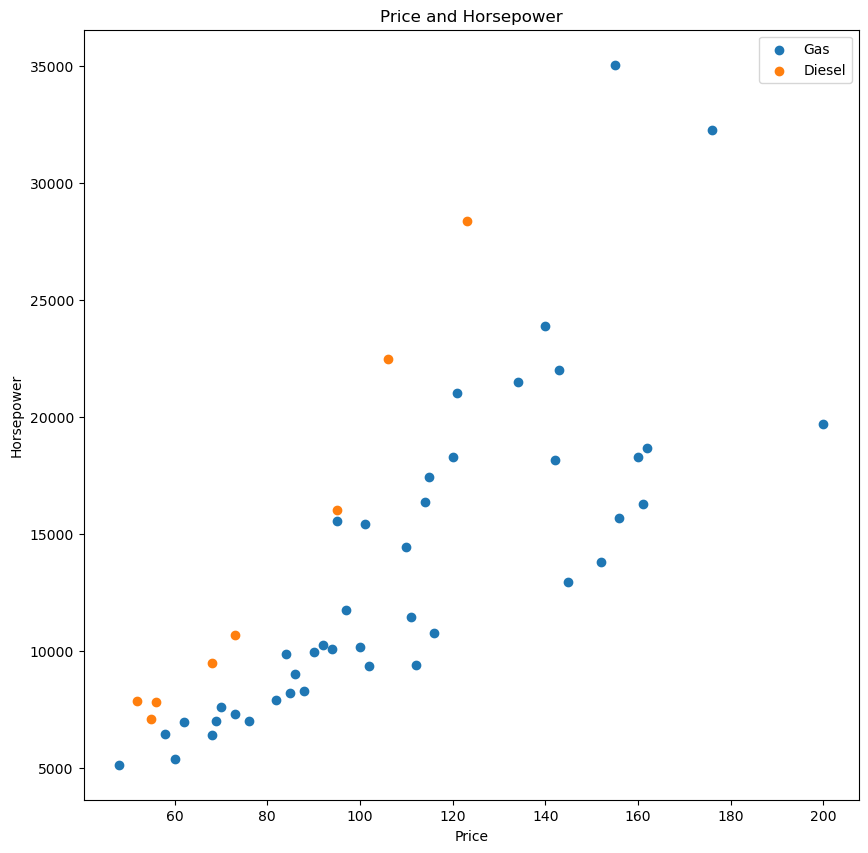

In [10]:
# Scatter plot price vs horsepower for different fuel types
plt.figure(figsize=[10, 10])
plt.scatter(data_1['horsepower'], data_1['price'])
plt.scatter(data_2['horsepower'], data_2['price'])
plt.title('Price and Horsepower')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.legend(['Gas', 'Diesel'])
plt.show()

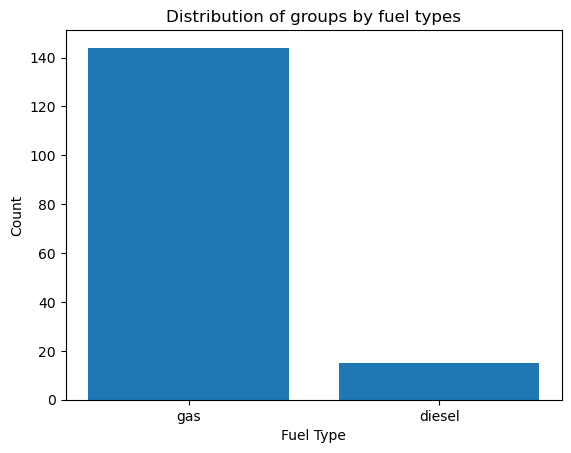

In [11]:
# Bar plot of fuel type distribution
group_counts = df['fuel-type'].value_counts()
plt.bar(group_counts.index, group_counts)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of groups by fuel types')
plt.show()

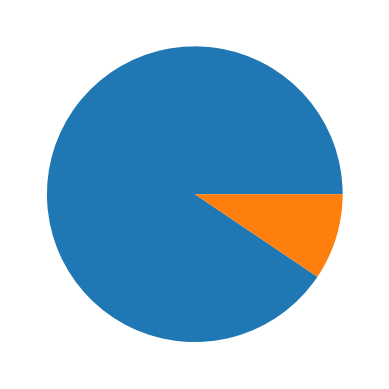

In [12]:
# Pie chart of fuel type distribution
plt.pie(group_counts)
plt.show()

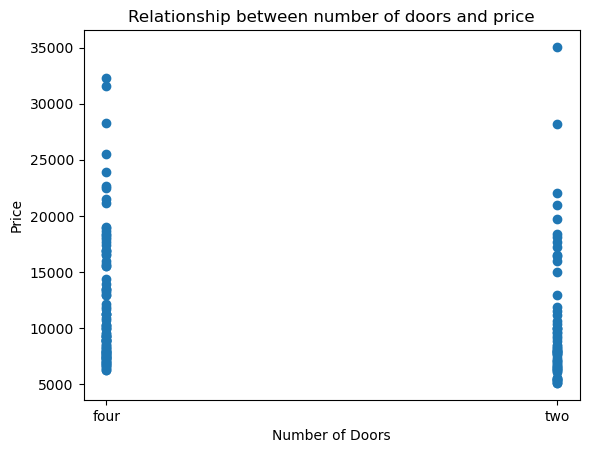

In [13]:
# Scatter plot of number of doors vs price
data1 = df['num-of-doors']
data2 = df['price']
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.title('Relationship between number of doors and price')
plt.scatter(data1, data2)
plt.show()

<Axes: >

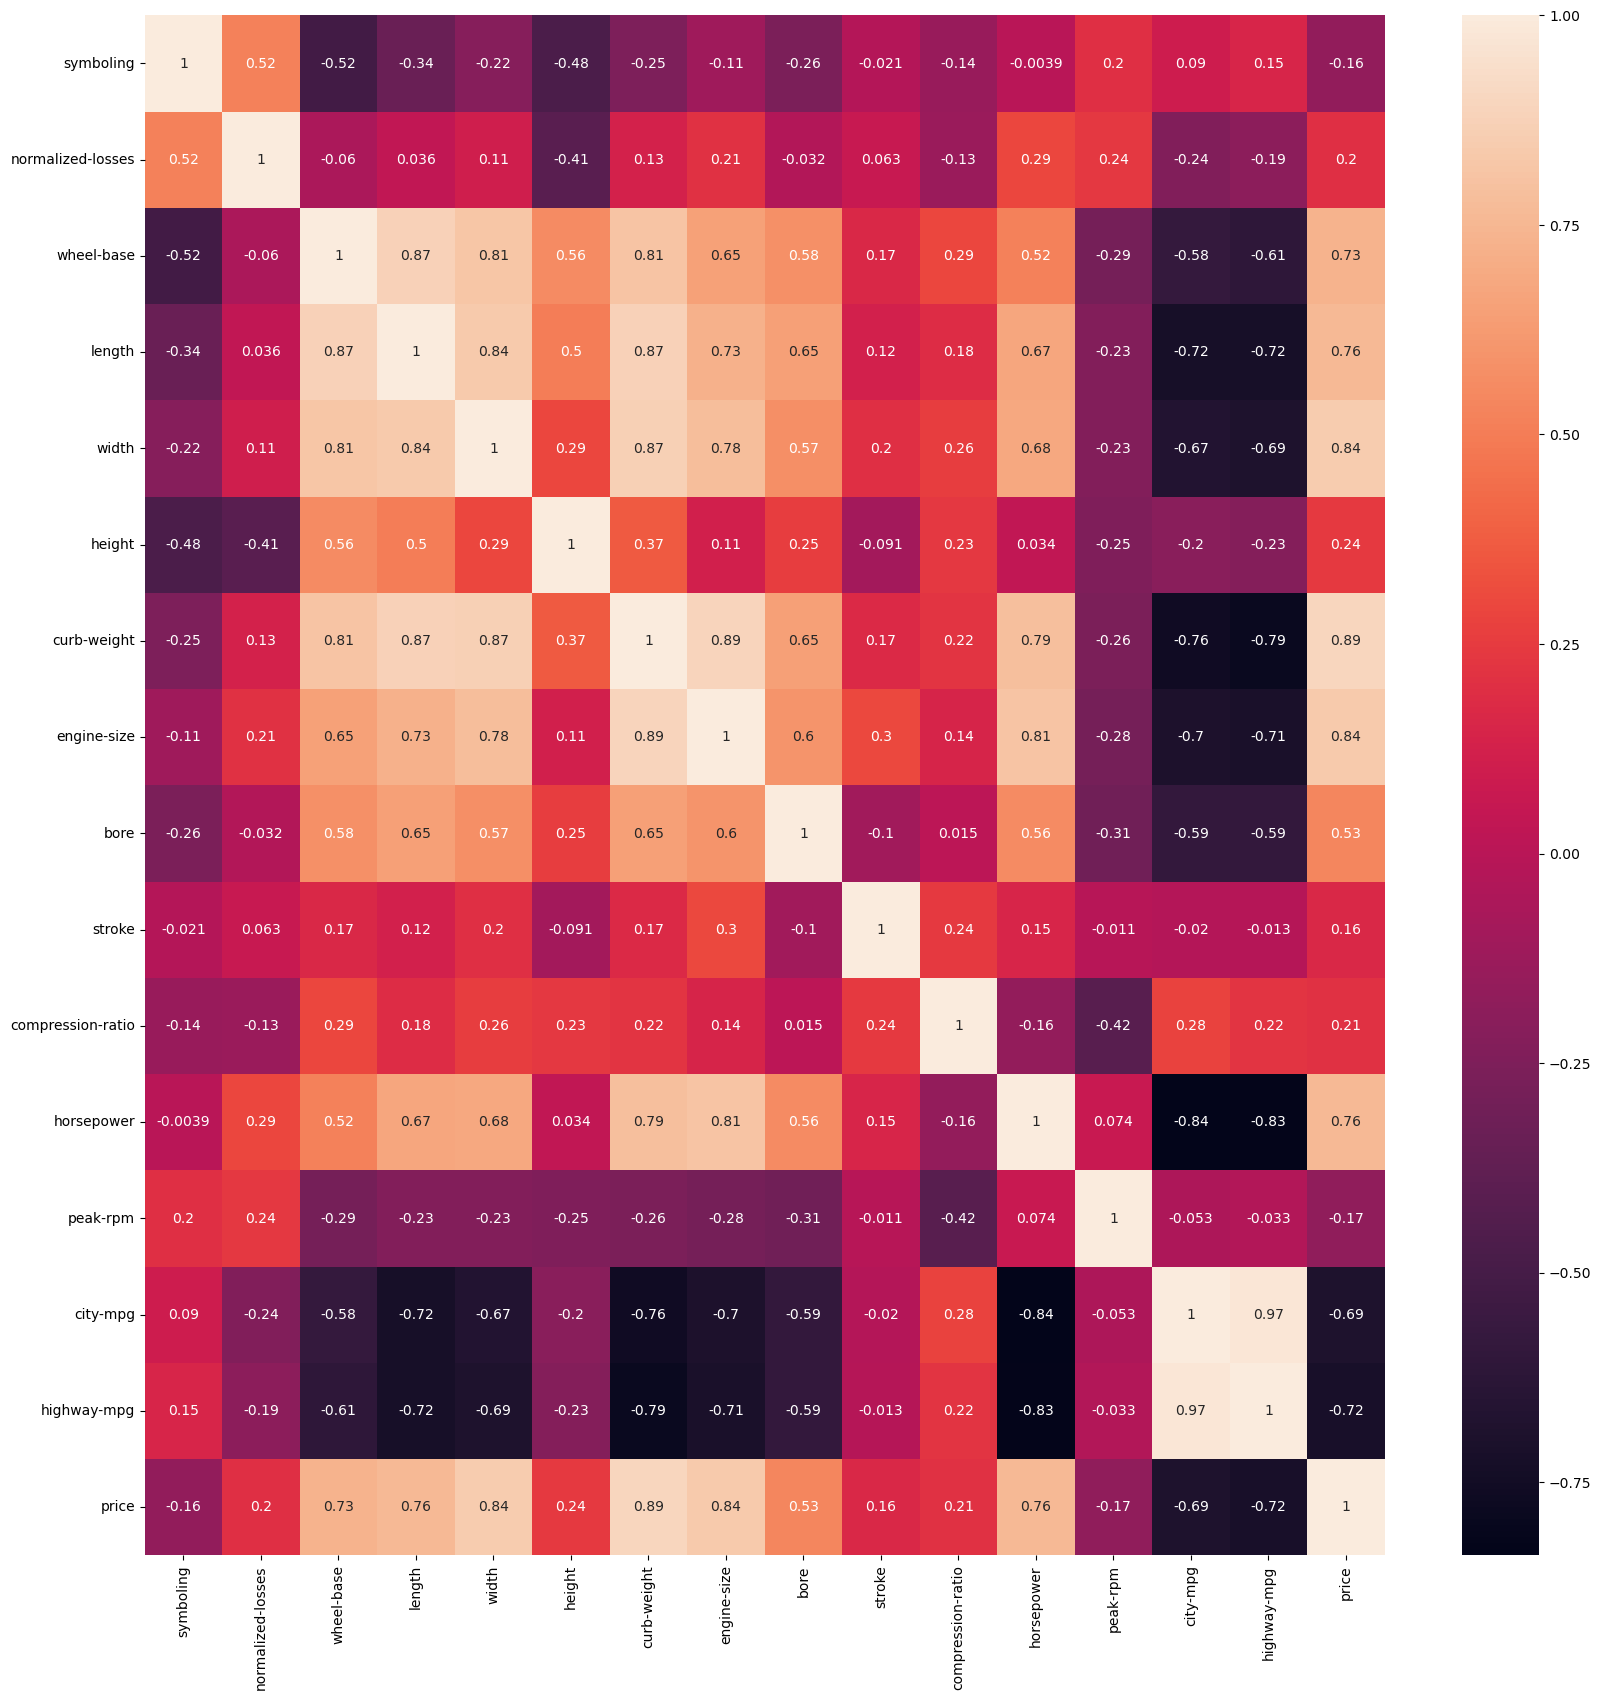

In [14]:
# Heatmap for correlation matrix
corr_mat_df = df.select_dtypes(include=['float64', 'int64'])
corr_mat = corr_mat_df.corr()
plt.figure(figsize=[20, 20])
sns.heatmap(corr_mat, annot=True)

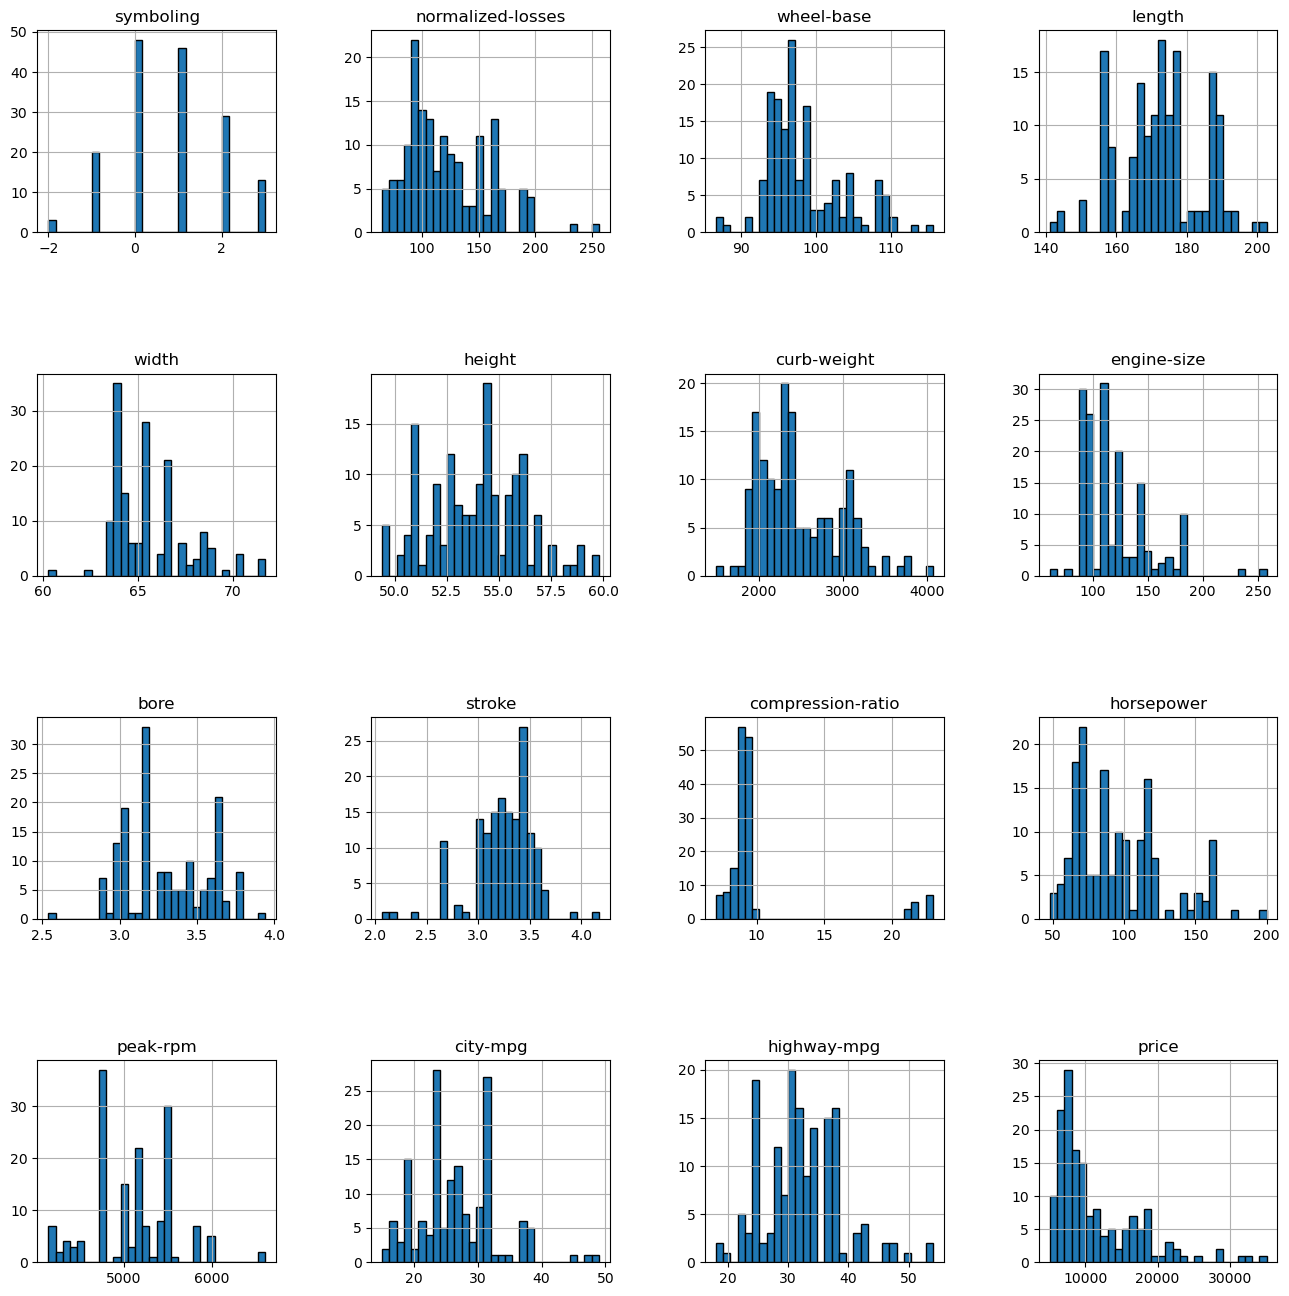

In [15]:
# Histograms for selected columns
df.iloc[:, [0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25]].hist(figsize=(16, 16), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

train_set:
[[1.         0.8414956  0.2027613 ]
 [0.8414956  1.         0.20781961]
 [0.2027613  0.20781961 1.        ]]
test_set:
[[ 1.          0.8414956  -0.16279428]
 [ 0.8414956   1.         -0.1094533 ]
 [-0.16279428 -0.1094533   1.        ]]


Result:
[[1.         0.8414956  0.2027613 ]
 [0.8414956  1.         0.20781961]
 [0.2027613  0.20781961 1.        ]]
[[ 1.          0.8414956  -0.16279428]
 [ 0.8414956   1.         -0.1094533 ]
 [-0.16279428 -0.1094533   1.        ]]


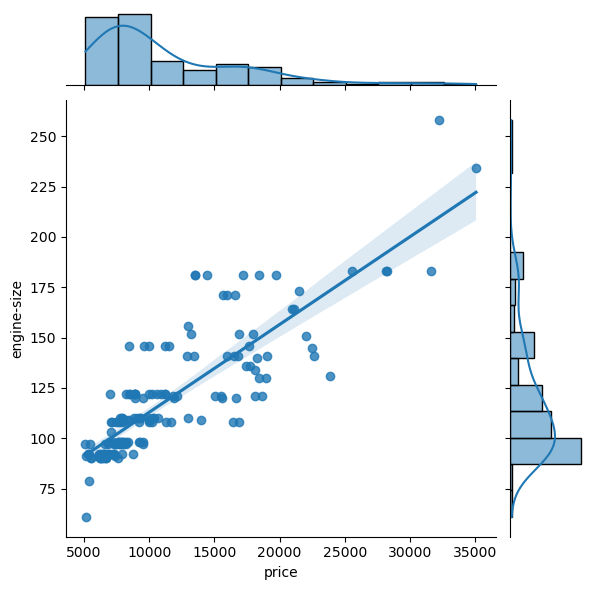

In [16]:
# Jointplot for price and engine-size using seaborn
sns.jointplot(y="engine-size", x="price", kind='reg', data=df)

# Feature selection using VarianceThreshold
train_set = df[["price", "engine-size", "normalized-losses"]].corr().to_numpy()
print("train_set:")
print(train_set)
test_set = df[["price", "engine-size", "symboling"]].corr().to_numpy()
print("test_set:")
print(test_set)
selector = VarianceThreshold()
selector.fit(train_set)  # fit on trainset
transformed_train = selector.transform(train_set)
print("\n\nResult:")
print(transformed_train)
transformed_test = selector.transform(test_set)
print(transformed_test)

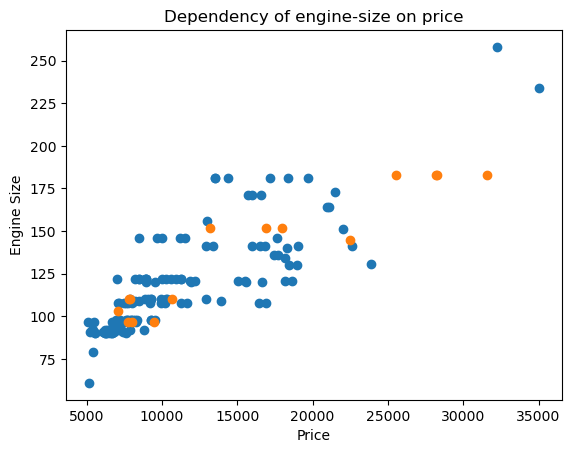

In [17]:
# Scatter plot of engine-size vs price for different fuel types
data10 = df[df['fuel-type'] == 'gas']['price']
data11 = df[df['fuel-type'] == 'diesel']['price']
data20 = df[df['fuel-type'] == 'gas']['engine-size']
data21 = df[df['fuel-type'] == 'diesel']['engine-size']

plt.title('Dependency of engine-size on price')
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.scatter(data10, data20)
plt.scatter(data11, data21)
plt.show()